# Introduction

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
# %pip install --upgrade plotly

## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print('df_hh_income shape: ', df_hh_income.shape) #Thu nhập trung bình trên 1 hộ 
print('df_pct_poverty shape: ', df_pct_poverty.shape) #Tỉ lệ nghèo 
print('df_pct_completed_hs shape: ', df_pct_completed_hs.shape) #Tỉ lệ trình độ THPT
print('df_share_race_city shape: ', df_share_race_city.shape) #Nhân khẩu theo chủng người 

print('df_fatalities shape: ', df_fatalities.shape)

df_hh_income shape:  (29322, 3)
df_pct_poverty shape:  (29329, 3)
df_pct_completed_hs shape:  (29329, 3)
df_share_race_city shape:  (29268, 7)
df_fatalities shape:  (2535, 14)


In [ ]:
print('df_hh_income columns: ', df_hh_income.columns)
print('df_pct_poverty columns: ', df_pct_poverty.columns)
print('df_pct_completed_hs columns: ', df_pct_completed_hs.columns)
print('df_share_race_city columns: ', df_share_race_city.columns)
print('df_fatalities columns: ', df_fatalities.columns)

df_hh_income columns:  Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
df_pct_poverty columns:  Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
df_pct_completed_hs columns:  Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
df_share_race_city columns:  Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
df_fatalities columns:  Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [ ]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [ ]:
df_hh_income = df_hh_income.fillna(0)
df_pct_poverty = df_pct_poverty.fillna(0)
df_pct_completed_hs = df_pct_completed_hs.fillna(0)
df_share_race_city = df_share_race_city.fillna(0)
df_fatalities = df_fatalities.fillna(0)


In [ ]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
poverty_rate = df_pct_poverty[['Geographic Area', 'poverty_rate']]
poverty_rate = poverty_rate[poverty_rate.poverty_rate != '-']
# poverty_rate.poverty_rate = poverty_rate.poverty_rate.astype(str).str.replace("-", "0")
poverty_rate.poverty_rate = pd.to_numeric(poverty_rate.poverty_rate)
poverty_rate = poverty_rate.groupby('Geographic Area').mean()
poverty_rate = poverty_rate.sort_values(by='poverty_rate', ascending=True)
poverty_rate

,poverty_rate
Geographic Area,
NJ,8.19
CT,9.14
MA,9.59
WY,9.89
MD,10.31
RI,10.37
NY,11.67
UT,11.98
ND,12.16


In [ ]:
import plotly.express as px

h_bar = px.bar(x=poverty_rate.poverty_rate,
               y=poverty_rate.index,
               orientation='h',
               title='Percentage of poverty by US state')
h_bar.update_layout(xaxis_title='Percentage', yaxis_title='State')
h_bar.show()



# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

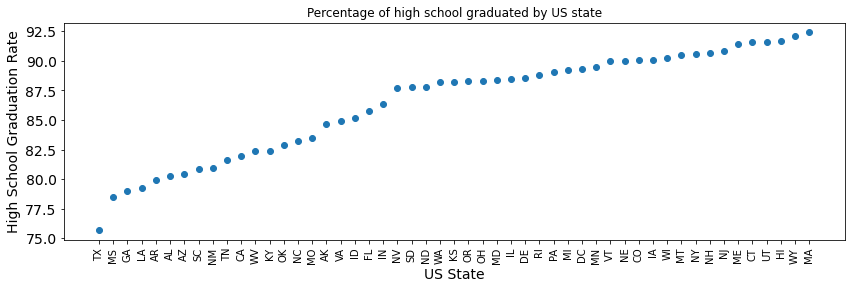

In [ ]:
df_pct_completed_hs
hsg_rate = df_pct_completed_hs[['Geographic Area', 'percent_completed_hs']]
hsg_rate = hsg_rate[hsg_rate.percent_completed_hs != '-']
# poverty_rate.poverty_rate = poverty_rate.poverty_rate.astype(str).str.replace("-", "0")
hsg_rate.percent_completed_hs = pd.to_numeric(hsg_rate.percent_completed_hs)
hsg_rate = hsg_rate.groupby('Geographic Area').mean()
hsg_rate = hsg_rate.sort_values(by='percent_completed_hs', ascending=True)

# h_bar = px.bar(x=hsg_rate.percent_completed_hs,
#                y=hsg_rate.index,
#                orientation='h',
#                title='Percentage of high school graduated by US state')
# h_bar.update_layout(xaxis_title='Percentage', yaxis_title='State')
# h_bar.show()
plt.figure(figsize=(14, 4))
plt.title('Percentage of high school graduated by US state')
plt.ylabel('High School Graduation Rate', fontsize=14)
plt.xlabel('US State', fontsize=14)

plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=14)
plt.scatter(hsg_rate.index, hsg_rate)

plt.show()


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

Text(0, 0.5, 'High School Graduation Rate')

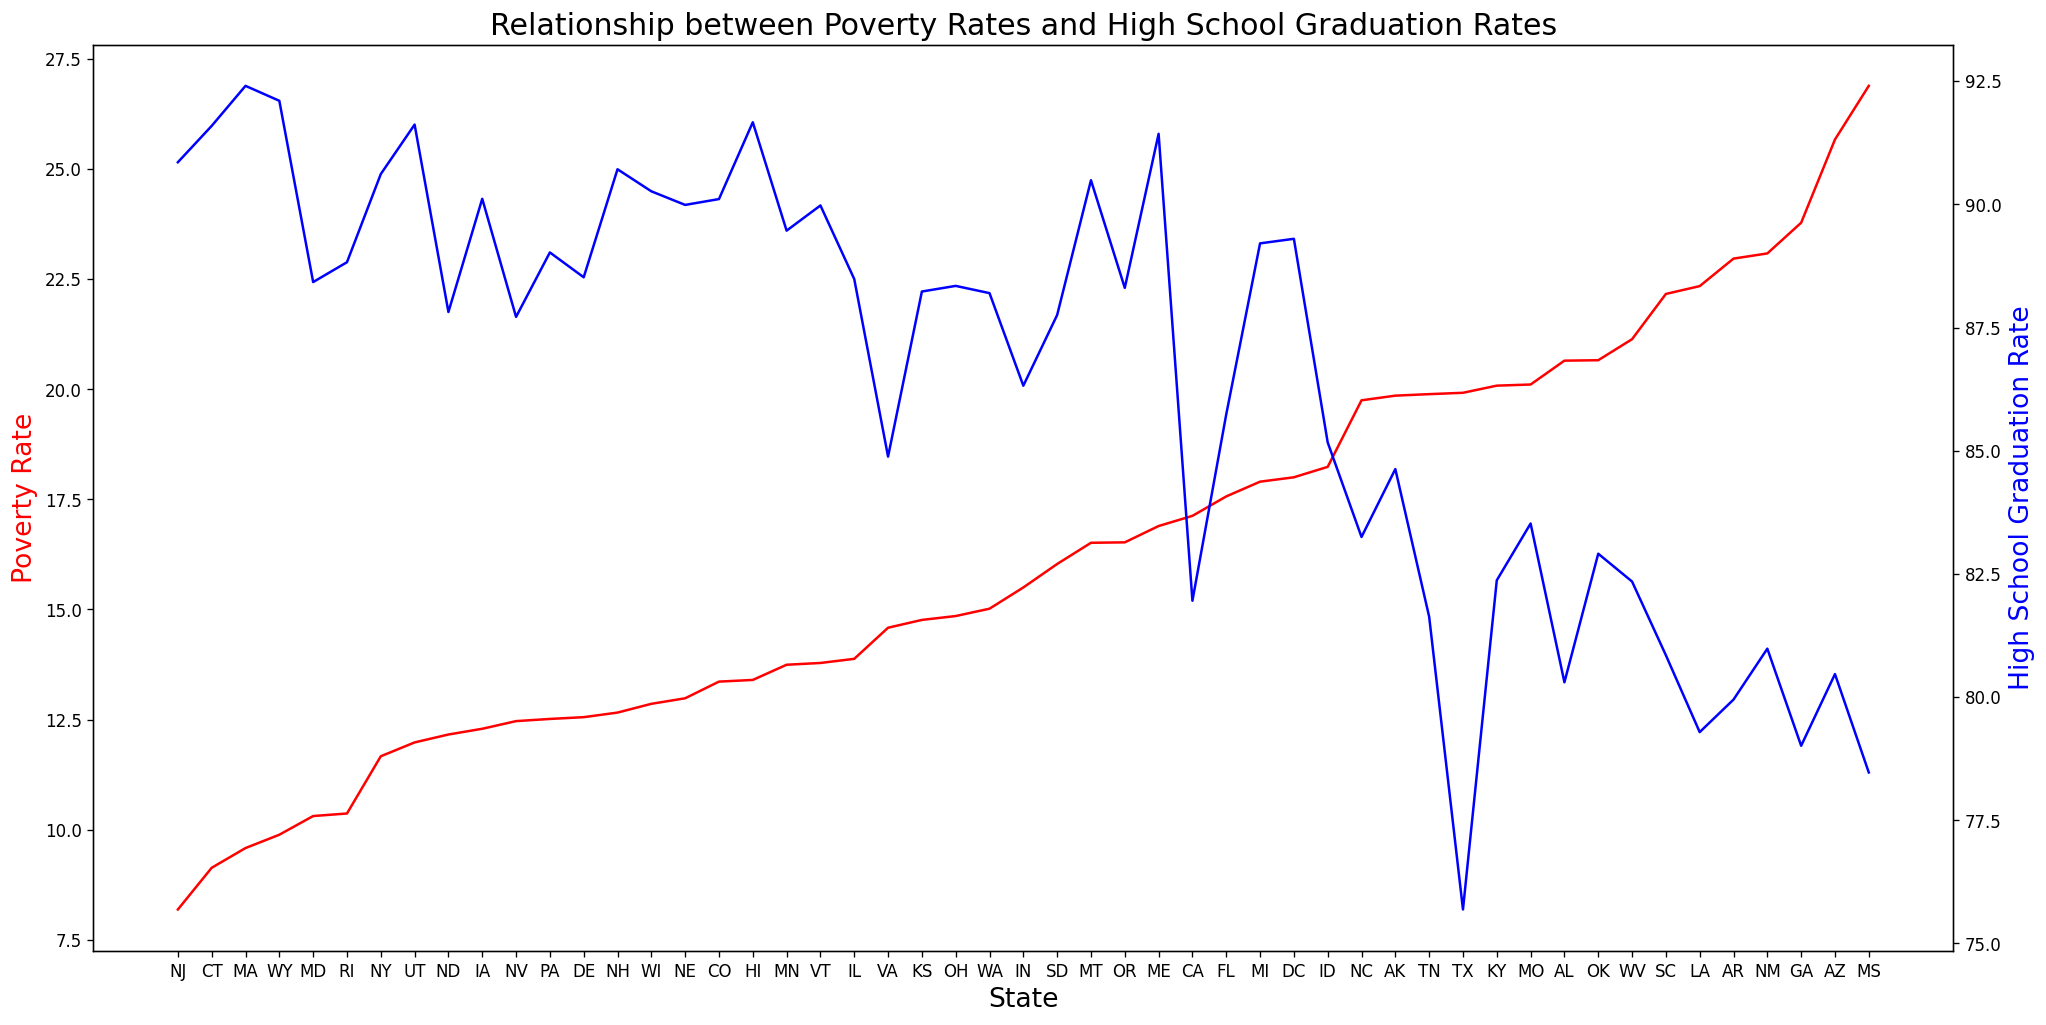

In [ ]:
merge_df = pd.merge(poverty_rate, hsg_rate, on='Geographic Area')
merge_df
plt.figure(figsize=(20,10), dpi=120)
plt.title('Relationship between Poverty Rates and High School Graduation Rates', fontsize=18)
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(merge_df.index, merge_df.poverty_rate.values, color='red')
ax2.plot(merge_df.index, merge_df.percent_completed_hs.values, color='blue')

ax1.set_xlabel('State', fontsize=16)
ax1.set_ylabel('Poverty Rate', color='red', fontsize=16)
ax2.set_ylabel('High School Graduation Rate', color='blue', fontsize=16)



#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [ ]:
scatter = px.scatter(merge_df,
                     x='poverty_rate',
                     y='percent_completed_hs',
                     title='Relationship between Poverty Rates and High School Graduation Rates',
                     size='poverty_rate',
                     hover_name=merge_df.index,
                     color='percent_completed_hs')

scatter.update_layout(xaxis_title="Poverty Rate",
                      yaxis_title="High School Graduation Rate",
                      yaxis=dict(type='log'))
 
scatter.show()

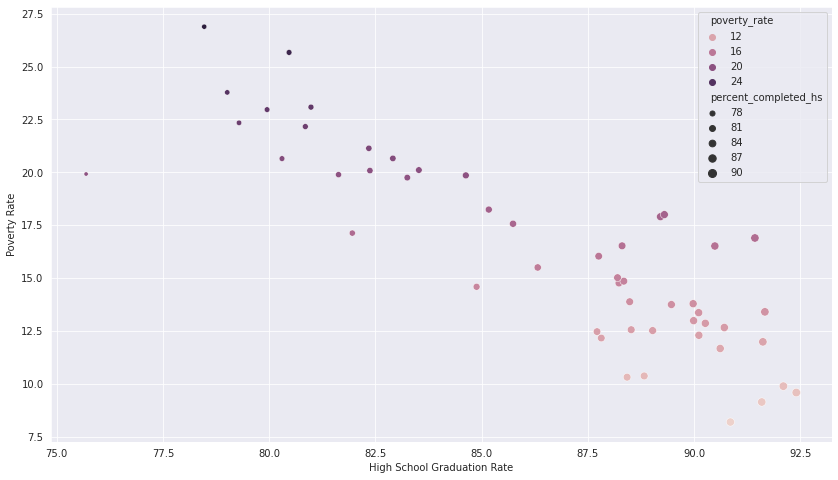

In [ ]:
import seaborn as sns

plt.figure(figsize=(14,8))
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=merge_df,
                       x='percent_completed_hs',
                       y='poverty_rate',
                       hue='poverty_rate',
                       size='percent_completed_hs')
  ax.set(xlabel='High School Graduation Rate',
         ylabel='Poverty Rate')


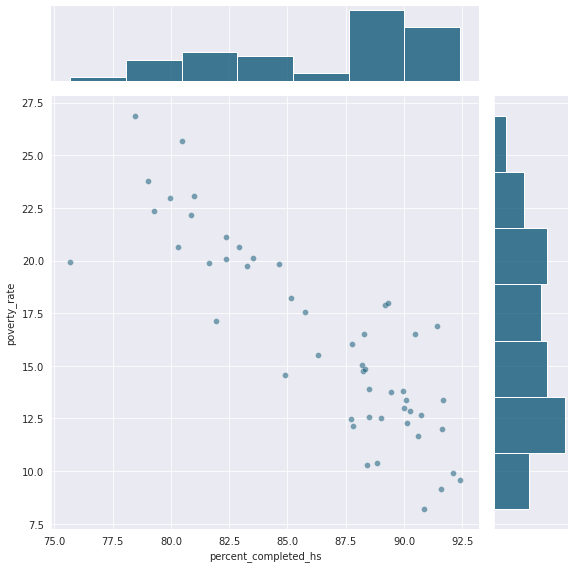

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=merge_df.percent_completed_hs,
               y=merge_df.poverty_rate,
               height=8,
               kind='scatter',
               color='#03506F',
               joint_kws={'alpha':0.5},
               )
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

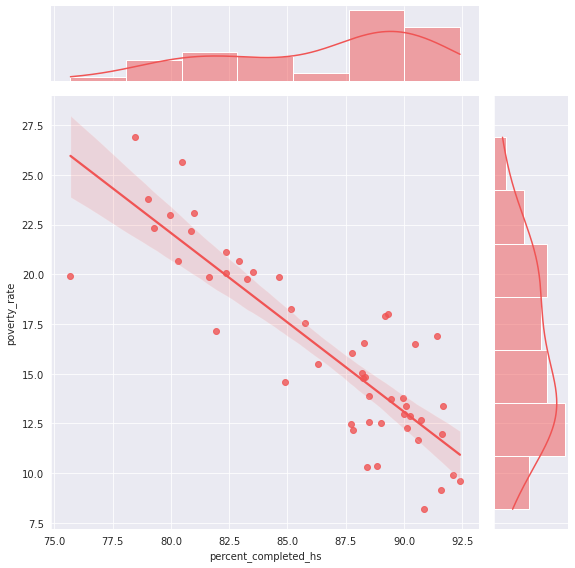

In [ ]:
# plt.figure(figsize=(14,8), dpi=200)
# with sns.axes_style('darkgrid'):
#   ax = sns.regplot(data=merge_df,
#               x='poverty_rate',
#               y='percent_completed_hs')
#   ax.set(ylabel='High School Graduation Rate',
#          xlabel='Poverty Rate')

with sns.axes_style('darkgrid'):
  sns.jointplot(x=merge_df.percent_completed_hs,
                y=merge_df.poverty_rate,
                height=8,
                kind='reg',
                color='#F05454')
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [ ]:
#high_school_completed_rate = df_pct_completed_hs.groupby(['Geographic Area'],dropna=True).mean().sort_values('percent_completed_hs',ascending=True)
df_share_race_city.share_black = pd.to_numeric(df_share_race_city.share_black, errors='coerce')
#df_share_race_city.share_black
df_share_race_city.share_white = pd.to_numeric(df_share_race_city.share_white, errors='coerce')
df_share_race_city.share_native_american = pd.to_numeric(df_share_race_city.share_native_american, errors='coerce')

df_share_race_city.share_asian = pd.to_numeric(df_share_race_city.share_asian, errors='coerce')
df_share_race_city.share_hispanic = pd.to_numeric(df_share_race_city.share_hispanic, errors='coerce')
#df_share_race_city.share_hispanic
#df_share_race_city.isna().values.any()

racial_makeup_by_state_1= df_share_race_city.groupby(['Geographic area']).mean()
racial_makeup_by_state_1.isna().values.any()

# df_share_race_city_tx = df_share_race_city[df_share_race_city['Geographic area']=='TX']
# df_share_race_city_tx
racial_makeup_by_state_1

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,45.65,0.57,45.86,1.39,2.15
AL,72.51,23.32,0.66,0.48,2.98
AR,78.45,16.30,0.76,0.48,4.27
AZ,59.93,0.95,28.59,0.73,20.14
CA,71.87,2.69,1.72,5.57,29.65
CO,87.77,0.92,1.62,1.15,17.90
CT,86.11,4.99,0.66,2.99,7.98
DC,38.50,50.70,0.30,3.50,9.10
DE,76.25,15.39,0.52,2.00,7.42


In [ ]:
df_share_race_city_clean_1 = df_share_race_city
df_share_race_city_clean_1.share_black = pd.to_numeric(df_share_race_city_clean_1.share_black, errors='coerce')
df_share_race_city_clean_1.share_white = pd.to_numeric(df_share_race_city_clean_1.share_white, errors='coerce')
df_share_race_city_clean_1.share_native_american = pd.to_numeric(df_share_race_city_clean_1.share_native_american, errors='coerce')
df_share_race_city_clean_1.share_asian = pd.to_numeric(df_share_race_city_clean_1.share_asian, errors='coerce')
df_share_race_city_clean_1.share_hispanic = pd.to_numeric(df_share_race_city_clean_1.share_hispanic, errors='coerce')

total_by_states = df_share_race_city_clean_1.share_black + df_share_race_city_clean_1.share_white + df_share_race_city_clean_1.share_hispanic + df_share_race_city_clean_1.share_native_american + df_share_race_city_clean_1.share_asian
total_by_states
df_share_race_city_clean = df_share_race_city_clean_1 
df_share_race_city_clean['Total_share'] = total_by_states
df_share_race_city_clean.drop(df_share_race_city_clean[df_share_race_city_clean['Total_share']>100].index, inplace = True)
df_share_race_city_clean

racial_makeup_by_state_clean = df_share_race_city_clean.groupby(['Geographic area']).mean()
racial_makeup_by_state_clean

,share_white,share_black,share_native_american,share_asian,share_hispanic,Total_share
Geographic area,,,,,,
AK,44.92,0.50,46.55,1.21,1.81,94.99
AL,73.40,22.89,0.78,0.37,1.68,99.12
AR,79.02,16.99,0.61,0.32,1.98,98.92
AZ,35.23,0.21,61.08,0.30,2.18,99.00
CA,83.27,2.00,2.58,4.70,5.41,97.97
CO,93.77,0.31,1.48,0.83,2.59,98.97
CT,82.79,6.65,3.13,2.22,3.69,98.48
DE,77.24,15.89,0.71,1.41,3.89,99.14
FL,76.26,17.59,0.68,0.88,3.67,99.08


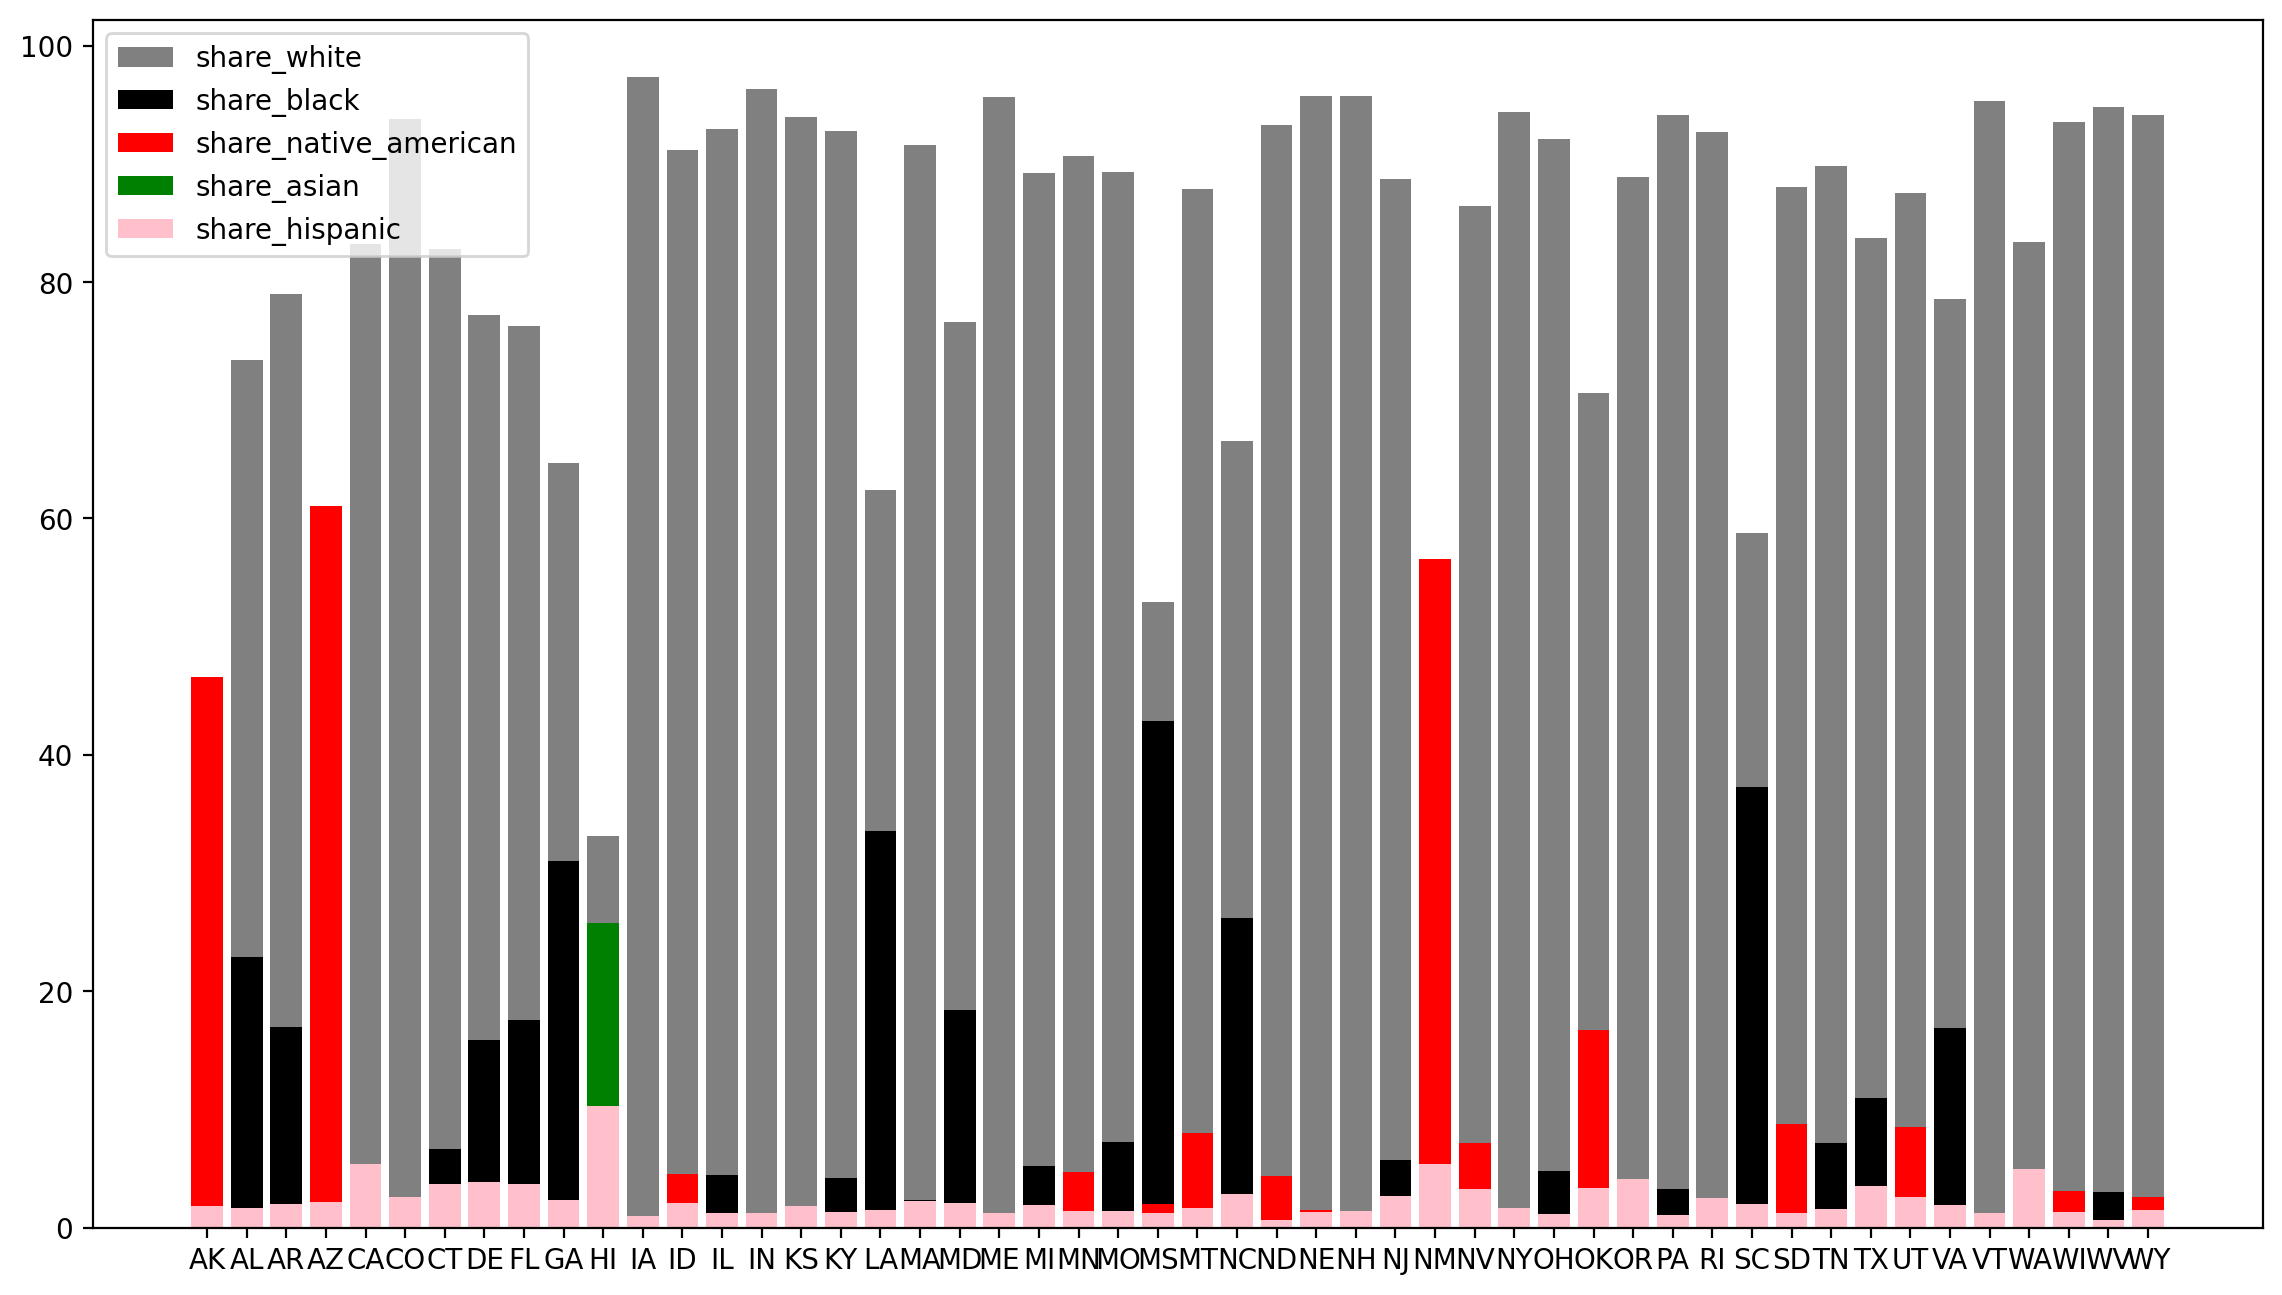

In [ ]:
plt.figure(figsize=(14,8), dpi=200)
plt.bar(racial_makeup_by_state_clean.index, racial_makeup_by_state_clean.share_white, color='grey')
plt.bar(racial_makeup_by_state_clean.index, racial_makeup_by_state_clean.share_black, color='black')
plt.bar(racial_makeup_by_state_clean.index, racial_makeup_by_state_clean.share_native_american, color='red')
plt.bar(racial_makeup_by_state_clean.index, racial_makeup_by_state_clean.share_asian, color='green')
plt.bar(racial_makeup_by_state_clean.index, racial_makeup_by_state_clean.share_hispanic, color='pink')
plt.legend(['share_white', 'share_black', 'share_native_american','share_asian','share_hispanic'])



# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
group_kill_by_race = df_fatalities['race'].value_counts()
group_kill_by_race


W    1201
B     618
H     423
0     195
A      39
N      31
O      28
Name: race, dtype: int64

In [ ]:
px.pie(df_fatalities, group_kill_by_race.index,
       group_kill_by_race.values,
       title='People Killed by Race')

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [ ]:
gdr = df_fatalities.value_counts('gender')

px.pie(data_frame=df_fatalities,
       names=gdr.index,
       values=gdr.values,
       title='People are killed by gender')

gender
M    2428
F     107
dtype: int64

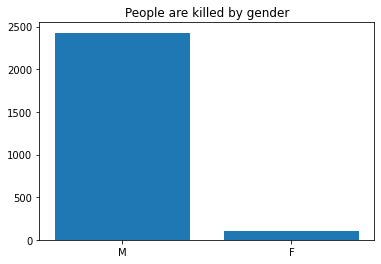

In [ ]:
plt.bar(gdr.index, gdr.values)
plt.title('People are killed by gender')
gdr

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

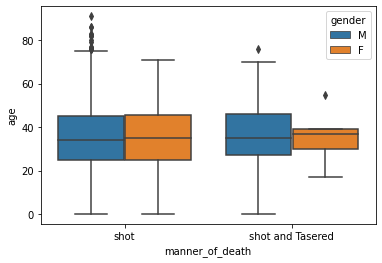

In [ ]:
sns.boxplot(data=df_fatalities, x='manner_of_death', y='age', hue='gender')

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [ ]:
values = df_fatalities.value_counts('armed')
values_data_frame = pd.DataFrame({
    'index': values.index,
    'values': values.values,
})
count_df= df_fatalities.groupby('armed').count()
count_df

,id,name,date,manner_of_death,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
armed,,,,,,,,,,,,,
0,9,9,9,9,9,9,9,9,9,9,9,9,9
Taser,9,9,9,9,9,9,9,9,9,9,9,9,9
air conditioner,1,1,1,1,1,1,1,1,1,1,1,1,1
ax,9,9,9,9,9,9,9,9,9,9,9,9,9
baseball bat,8,8,8,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
toy weapon,104,104,104,104,104,104,104,104,104,104,104,104,104
unarmed,171,171,171,171,171,171,171,171,171,171,171,171,171
undetermined,117,117,117,117,117,117,117,117,117,117,117,117,117


In [ ]:
count_df['percentage'] = count_df['id'] *100 / float(sum(count_df['id']))
count_df

,id,name,date,manner_of_death,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,percentage
armed,,,,,,,,,,,,,,
0,9,9,9,9,9,9,9,9,9,9,9,9,9,0.36
Taser,9,9,9,9,9,9,9,9,9,9,9,9,9,0.36
air conditioner,1,1,1,1,1,1,1,1,1,1,1,1,1,0.04
ax,9,9,9,9,9,9,9,9,9,9,9,9,9,0.36
baseball bat,8,8,8,8,8,8,8,8,8,8,8,8,8,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
toy weapon,104,104,104,104,104,104,104,104,104,104,104,104,104,4.10
unarmed,171,171,171,171,171,171,171,171,171,171,171,171,171,6.75
undetermined,117,117,117,117,117,117,117,117,117,117,117,117,117,4.62


In [ ]:
fig = px.bar(data_frame = count_df, x=count_df.index, y=count_df['percentage'], height=500)
fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
age_percent = df_fatalities[df_fatalities['age'] < 25].age
percent = round(len(age_percent) *100 / len(df_fatalities.age), 2)
percent

20.79

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

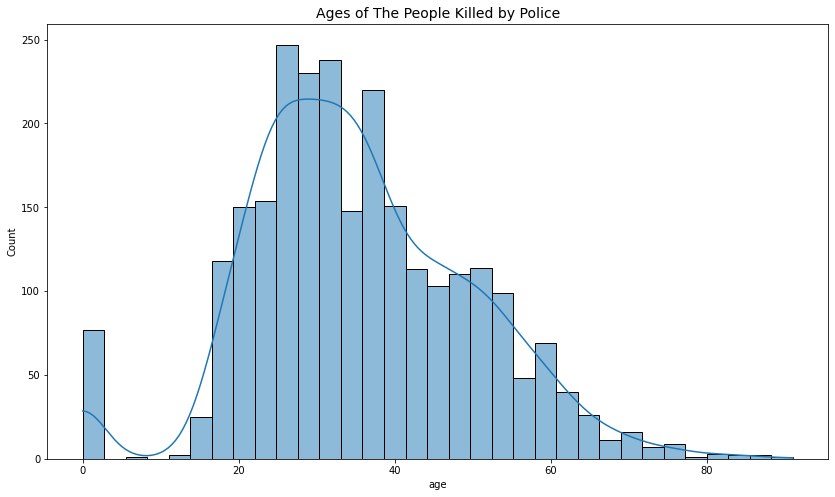

In [ ]:
plt.figure(figsize=(14,8))
plt.title('Ages of The People Killed by Police', fontsize=14)
sns.histplot(data=df_fatalities,
             x=df_fatalities.age,
             kde=True)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

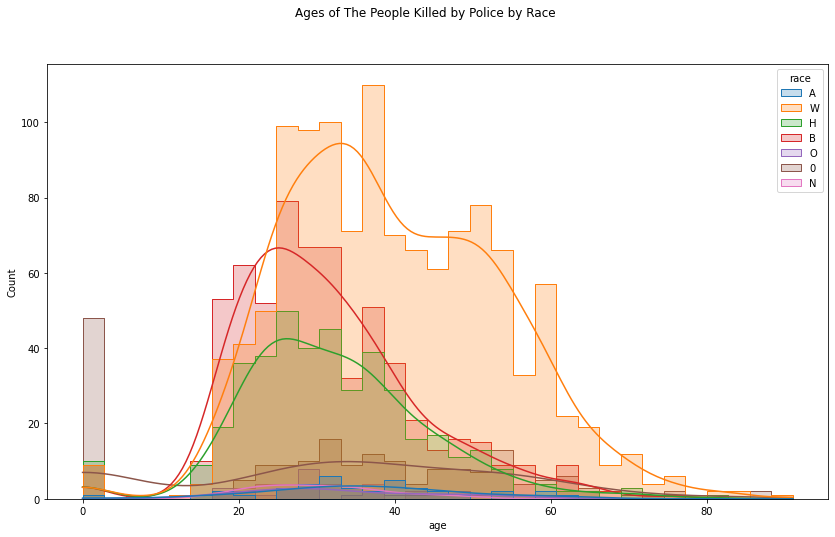

In [ ]:
plt.figure(figsize=(14, 8))
plt.suptitle('Ages of The People Killed by Police by Race')
sns.histplot(data=df_fatalities, x='age', kde=True, hue='race', element='step')
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [ ]:
group_kill_by_race

W    1201
B     618
H     423
0     195
A      39
N      31
O      28
Name: race, dtype: int64

In [ ]:
ax = px.bar(data_frame=group_kill_by_race,
       x=group_kill_by_race.index,
       y=group_kill_by_race.values,
       labels={'id':'Number of deaths'},
       title='Race of People Killed')
ax.update_layout(xaxis_title='Race', yaxis_title='Total')

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
per_ill = len(df_fatalities[df_fatalities['signs_of_mental_illness']==True].race)*100/len(df_fatalities['signs_of_mental_illness'])

In [ ]:
print(f'percentage of people died by mental illness are {round(per_ill,1)}%')

percentage of people died by mental illness are 25.0%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
cities = df_fatalities.city.value_counts().head(10)
cities
gb_city = df_fatalities.groupby(['city','race'], as_index=False).count()
sort_gb_city = gb_city.sort_values('name', ascending=False)
sort_gb_city

,city,race,id,name,date,manner_of_death,armed,age,gender,state,signs_of_mental_illness,threat_level,flee,body_camera
295,Chicago,B,21,21,21,21,21,21,21,21,21,21,21,21
921,Los Angeles,H,19,19,19,19,19,19,19,19,19,19,19,19
722,Houston,B,15,15,15,15,15,15,15,15,15,15,15,15
84,Austin,W,13,13,13,13,13,13,13,13,13,13,13,13
1402,San Antonio,H,12,12,12,12,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Greenwood,W,1,1,1,1,1,1,1,1,1,1,1,1
645,Greenville,W,1,1,1,1,1,1,1,1,1,1,1,1
643,Greenville,0,1,1,1,1,1,1,1,1,1,1,1,1
642,Greensboro,W,1,1,1,1,1,1,1,1,1,1,1,1


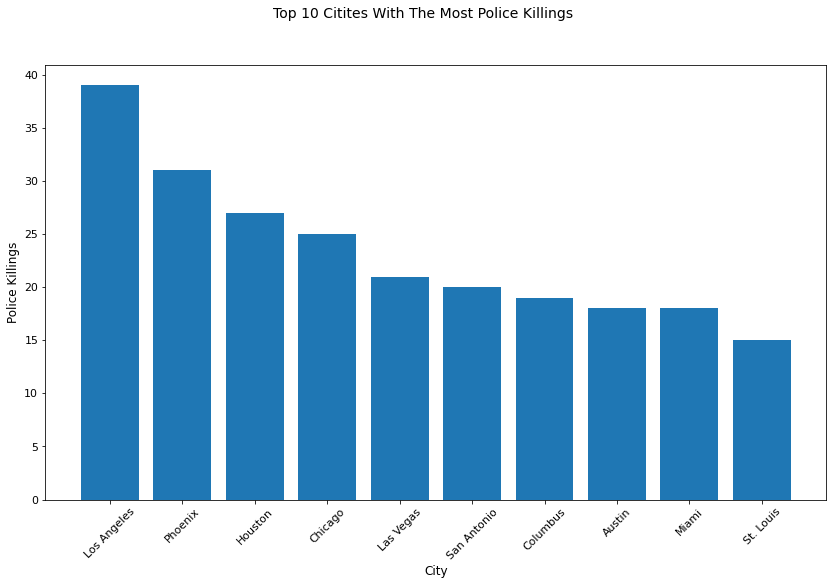

In [ ]:
plt.figure(figsize=(14, 8))
plt.suptitle('Top 10 Citites With The Most Police Killings', fontsize=14)
plt.ylabel('Police Killings', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(fontsize=11, rotation=45)
plt.yticks(fontsize=11)
plt.bar(cities.index, cities, label=cities.index, linewidth=3)
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [ ]:
px.bar(data_frame=sort_gb_city[:10],
       x=sort_gb_city[:10].city,
       y=sort_gb_city[:10].name,
       labels={'x':'city','y':'Number of deaths'},
       color='race') 

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [ ]:
states_to_map = df_fatalities.groupby('state').size().sort_values(ascending=False)
states_to_map

state
CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
WA     62
IL     62
TN     59
LA     57
NM     51
PA     51
AL     50
VA     47
NY     45
SC     44
KY     43
IN     43
WI     43
NV     42
OR     38
MD     38
MI     37
NJ     35
MN     32
WV     27
AR     26
KS     24
UT     23
MS     23
MA     22
ID     17
AK     15
NE     15
ME     13
IA     12
HI     11
MT     11
DC     11
SD     10
CT      9
DE      8
WY      8
NH      7
ND      4
VT      3
RI      2
dtype: int64

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations=states_to_map.index, # Spatial coordinates
    z = states_to_map, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Police Killings",
))

fig.update_layout(
    title_text = 'Police Killings by US State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [ ]:
monthly_fatalities = df_fatalities.copy()
monthly_fatalities.date = pd.to_datetime(monthly_fatalities.date, infer_datetime_format=True).dt.to_period('m')
monthly_fatalities.date = monthly_fatalities.date.astype(str)

In [ ]:
history = monthly_fatalities.groupby('date').size()
history

date
2015-01    70
2015-02    78
2015-03    87
2015-04    88
2015-05    85
2015-06    68
2015-07    85
2015-08    86
2015-09    90
2015-10    89
2015-11    80
2015-12    85
2016-01    85
2016-02    79
2016-03    89
2016-04    75
2016-05    82
2016-06    90
2016-07    78
2016-08    79
2016-09    71
2016-10    77
2016-11    84
2016-12    74
2017-01    75
2017-02    69
2017-03    74
2017-04    70
2017-05    61
2017-06    63
2017-07    71
2017-08    18
2017-09    23
2017-10    21
2017-11    16
2017-12    20
dtype: int64

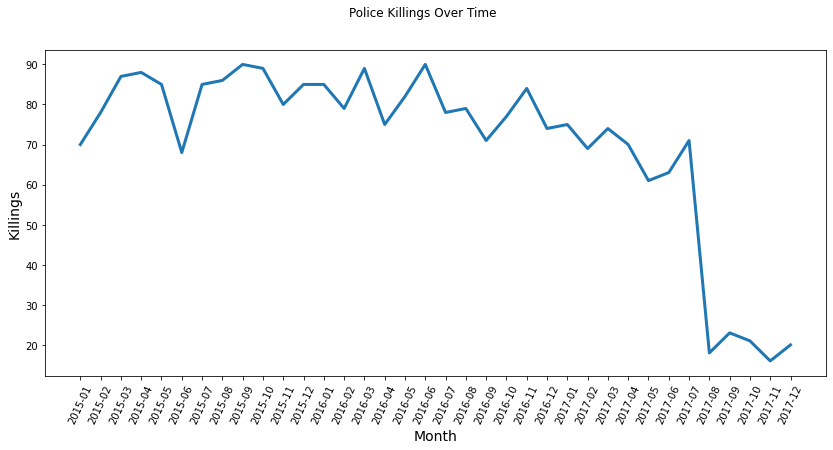

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(history.index, history, linewidth=3)
plt.xticks(ticks=history.index, fontsize=10, rotation=65)
plt.suptitle('Police Killings Over Time')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Killings', fontsize=14)

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).